In [65]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [4]:
df = pd.read_csv('Office Data.csv' , engine='python')

In [5]:
df.head()


,ID,Season,Episode,Title,Directed by,Written by,Original air date,US viewers\r\n(millions),rating,Jan,...,Gabe,Holly,Meredith,Stanley,Oscar,Toby,Pam,Kelly,Ryan,Phyllis
0,1_1,1,1,"""Pilot""",Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,3/24/2005,11.2,8.4,12,...,0,0,0,5,6,0,46,0,10,2
1,1_2,1,2,"""Diversity Day""",Ken Kwapis,B. J. Novak,3/29/2005,6.0,8.2,0,...,0,0,0,5,13,2,26,2,7,0
2,1_3,1,3,"""Health Care""",Ken Whittingham,Paul Lieberstein,4/5/2005,5.8,7.8,18,...,0,0,3,6,16,0,44,0,1,0
3,1_4,1,4,"""The Alliance""",Bryan Gordon,Michael Schur,4/12/2005,5.4,8.3,0,...,0,0,15,2,20,7,37,0,5,5
4,1_5,1,5,"""Basketball""",Greg Daniels,Greg Daniels,4/19/2005,5.0,7.6,0,...,0,0,0,6,2,0,17,0,8,4


Text(0.5, 1.0, "Nellie's Effect on the Office")

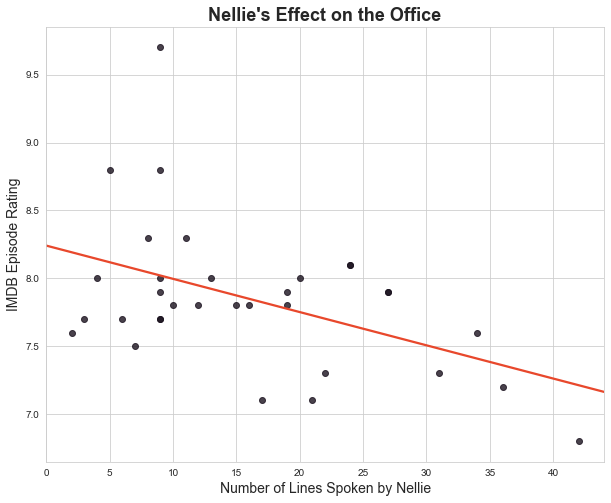

In [62]:

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

sns.regplot(x = 'Nellie', y = 'rating', ci = None, data = df[df['Nellie'] > 0],
           scatter_kws={"color": "#1B131F"}, 
            line_kws={"color": "#E8482C"})
plt.xlabel('Number of Lines Spoken by Nellie', fontsize = 14)
plt.ylabel('IMDB Episode Rating', fontsize = 14)
plt.title("Nellie's Effect on the Office", fontsize = 18, fontweight = 'bold', )


In [69]:
#Defining Dependent Variable
Y = df[df['Nellie'] > 0]['rating']     

#Defining Independent Variables
X = df[df['Nellie'] > 0][['Nellie']]    
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     8.342
Date:                Mon, 24 Feb 2020   Prob (F-statistic):            0.00700
Time:                        22:58:33   Log-Likelihood:                -22.281
No. Observations:                  33   AIC:                             48.56
Df Residuals:                      31   BIC:                             51.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2410      0.160     51.352      0.0

In [67]:
#Defining Dependent Variable
Y = df['rating']     

#Defining Independent Variables
X = df[['Jan','Andy','Angela','Darryl','Dwight','Erin','Jim','Kevin','Nellie','Creed','Robert','Michael','Karen','David',
            'Gabe','Holly','Meredith','Stanley','Oscar','Toby','Pam','Kelly','Ryan','Phyllis']]    
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4.748
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           7.49e-10
Time:                        22:54:26   Log-Likelihood:                -92.275
No. Observations:                 186   AIC:                             234.5
Df Residuals:                     161   BIC:                             315.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9140      0.122     64.843      0.0